In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
from pandas import read_csv
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/alfred/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
data = read_csv('Privacy & Security .csv',header=0)
sia = SIA()
result = []
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[1]
    y = data.iloc[i].values[2]
    rs= y.replace('\n', '')
    content_score = sia.polarity_scores(rs)
    title_score = sia.polarity_scores(x)
    #result.append(score['compound'])
    if title_score['compound'] == 0:
        data['Sentiment Score'].iloc[i] = content_score['compound'] 
    #if title_score['compound'] != 0 and title_score['compound']* content_score['compound'] <0:
       # print(i,title_score['compound'],content_score['compound'])
    if title_score['compound'] != 0:
        data['Sentiment Score'].iloc[i] = min(content_score['compound'],title_score['compound']) 
        

#print(result)
print(data['Sentiment Score'])

data.to_csv('Privacy & Security .csv',index=False, encoding='utf-8')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    -0.8021
1    -0.9712
2    -0.7966
3    -0.5423
4    -0.9404
5     0.9903
6     0.3182
7    -0.3768
8     0.3612
9    -0.9388
10    0.3182
11   -0.2263
12   -0.8886
13   -0.2960
14    0.9960
15    0.8348
16    0.3818
17    0.9599
18   -0.0772
19    0.9882
20    0.9850
21   -0.5994
22   -0.2263
23    0.9880
24    0.3400
25    0.5267
26    0.2023
27    0.9964
28    0.6369
29   -0.4019
       ...  
66    0.5267
67   -0.9849
68   -0.9662
69   -0.1761
70   -0.9358
71    0.9866
72    0.9932
73    0.9899
74    0.9932
75   -0.9924
76    0.3400
77   -0.9381
78   -0.9893
79   -0.9524
80   -0.4019
81   -0.9747
82    0.9850
83    0.4767
84   -0.0772
85   -0.3612
86   -0.8953
87   -0.6334
88    0.9629
89    0.9524
90   -0.2263
91    0.9771
92    0.3400
93   -0.9834
94   -0.9911
95   -0.9541
Name: Sentiment Score, Length: 96, dtype: float64


In [15]:
data = read_csv('Regulation.csv',header=0)
sia = SIA()
result = []
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[1]
    y = data.iloc[i].values[2]
    rs= y.replace('\n', '')
    content_score = sia.polarity_scores(rs)
    title_score = sia.polarity_scores(x)
    #result.append(score['compound'])
    if title_score['compound'] == 0:
        data['Sentiment Score'].iloc[i] = content_score['compound'] 
    #if title_score['compound'] != 0 and title_score['compound']* content_score['compound'] <0:
       # print(i,title_score['compound'],content_score['compound'])
    if title_score['compound'] != 0:
        data['Sentiment Score'].iloc[i] = min(content_score['compound'],title_score['compound']) 

#print(result)
print(data['Sentiment Score'])

data.to_csv('Regulation.csv',index=False, encoding='utf-8')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0      0.7351
1     -0.9684
2     -0.9712
3     -0.7551
4      0.6597
5      0.3612
6     -0.4019
7      0.9929
8      0.4404
9      0.2960
10    -0.6240
11     0.9805
12     0.3612
13     0.3818
14     0.2023
15    -0.9786
16     0.9969
17     0.2500
18    -0.5972
19    -0.7657
20     0.0772
21    -0.5574
22     0.9968
23     0.9986
24     0.9638
25     0.9529
26     0.4588
27    -0.8481
28     0.4019
29    -0.6697
        ...  
182    0.2263
183   -0.9778
184   -0.6472
185    0.9869
186    0.9821
187    0.4019
188    0.9863
189    0.9650
190    0.5994
191    0.0258
192    0.3400
193    0.8851
194    0.9736
195   -0.2732
196    0.9965
197   -0.5574
198    0.9970
199    0.9899
200    0.2732
201    0.3818
202    0.9866
203    0.3612
204    0.8415
205    0.2960
206    0.9580
207   -0.5574
208    0.9694
209   -0.7579
210   -0.5267
211   -0.6705
Name: Sentiment Score, Length: 212, dtype: float64


In [16]:
import numpy as np 
import csv
data = read_csv('Privacy & Security .csv',header=0)
outcome=[]
dic={}
d={}
for i in range(0,data.shape[0]):
    x = str(data.iloc[i].values[0])
    y = str(data.iloc[i].values[4]) 
    if x in dic:
        dic[x].append(float(y))
    else:
        dic[x]=[float(y)]
    
#print(dic)

for key in dic:
    result=round(np.mean(dic[key]),2)
    #print(result)
    d[key]=[result]
    outcome.append(result)
#print(len(outcome))
print(d)

with open('Privacy & Security result.csv','w') as f:
    w = csv.writer(f)
    w.writerows(d.items())

{'2015/6/5': [-0.8], '2015/6/18': [-0.97], '2016/2/19': [-0.8], '2016/2/29': [-0.54], '2016/3/11': [-0.94], '2016/3/15': [0.99], '2016/3/18': [0.32], '2016/3/24': [-0.01], '2016/3/29': [-0.94], '2016/4/14': [0.32], '2016/4/20': [-0.23], '2016/4/29': [-0.89], '2016/6/2': [-0.3], '2016/6/3': [1.0], '2016/6/8': [0.83], '2016/6/14': [0.38], '2016/6/28': [0.96], '2016/7/5': [-0.08], '2016/8/5': [0.99], '2016/8/8': [0.98], '2016/8/25': [-0.6], '2016/8/26': [-0.23], '2016/9/1': [0.99], '2016/9/28': [0.34], '2016/10/25': [0.53], '2016/12/19': [0.2], '2016/12/21': [1.0], '2017/1/4': [0.64], '2017/2/8': [-0.4], '2017/2/24': [0.92], '2017/3/10': [0.98], '2017/3/15': [-1.0], '2017/4/9': [0.3], '2017/4/10': [0.34], '2017/5/10': [0.32], '2017/5/19': [0.51], '2017/5/22': [0.08], '2017/5/26': [1.0], '2017/6/13': [0.1], '2017/6/19': [-0.99], '2017/7/12': [0.96], '2017/7/13': [0.65], '2017/8/18': [0.3], '2017/9/28': [-0.98], '2017/12/5': [-1.0], '2017/12/19': [-0.51], '2018/1/29': [0.03], '2018/2/13': [

[1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]


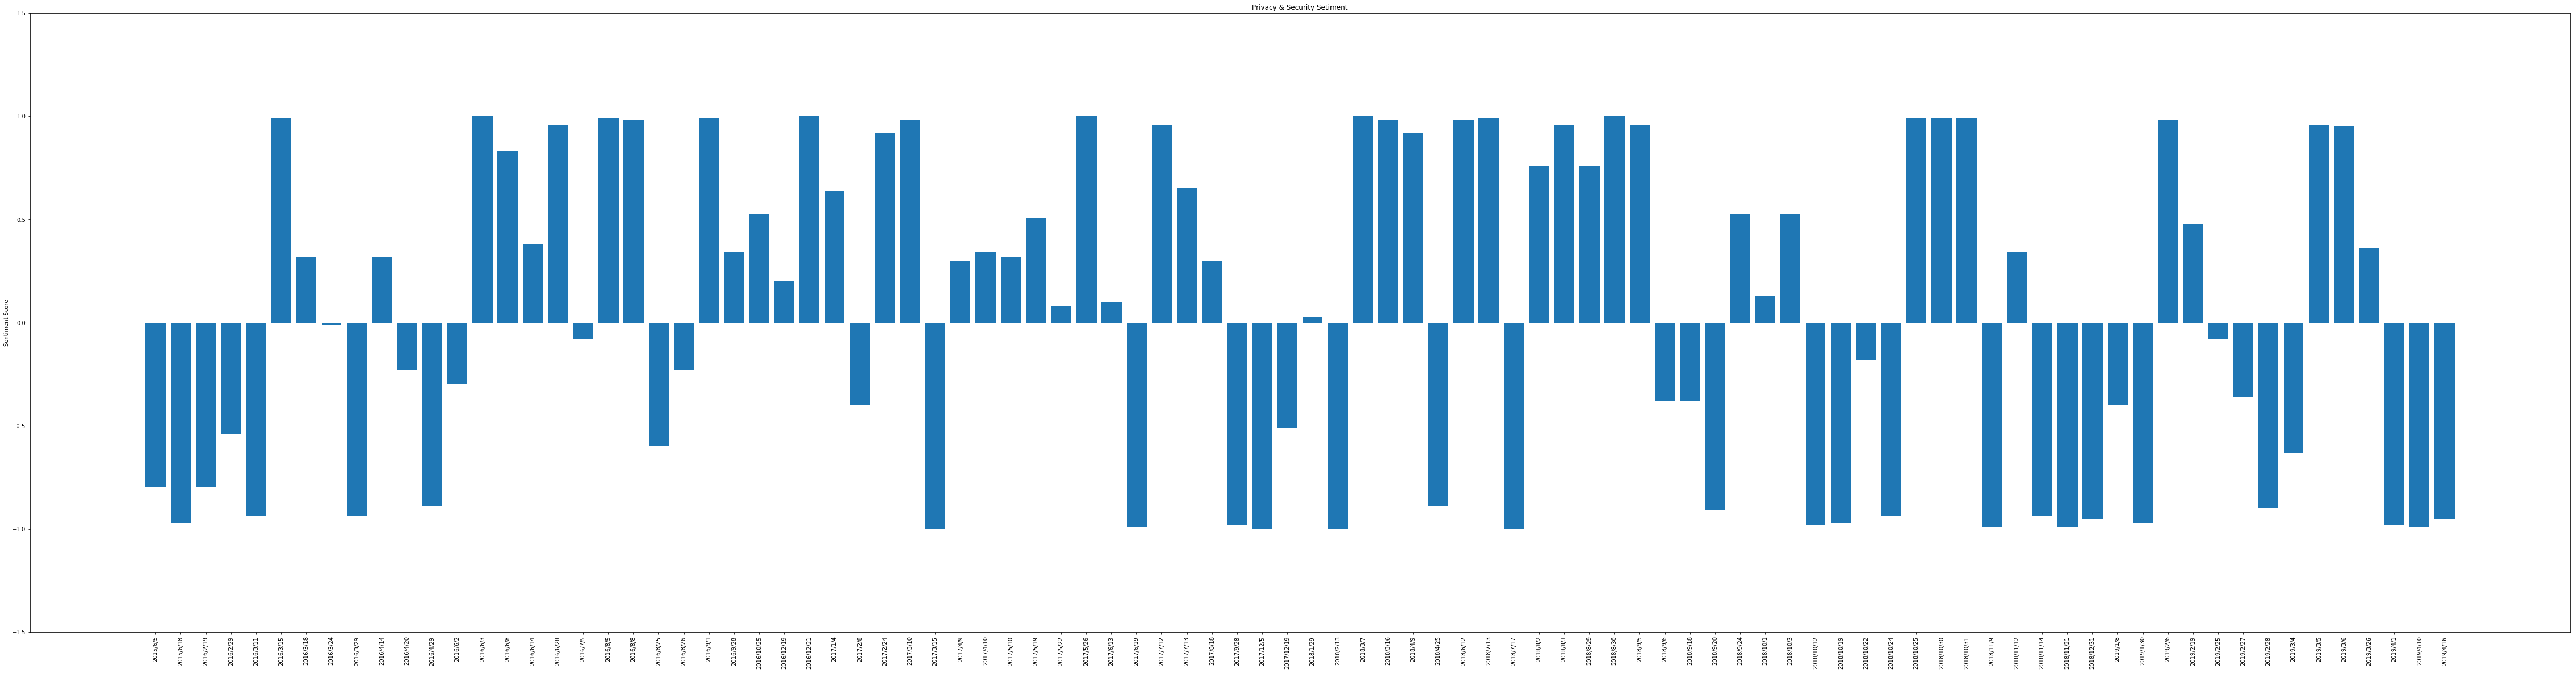

In [23]:
import matplotlib.pyplot as plt
date=[]
score=[]
pos=[]
neg=[]
a=0
b=0
for i in d:
    date.append(i)
    for k in d[i]:
        score.append(k)
        if k>0:
            a=a+1
            pos.append(a)
            a=0
            b=0
            neg.append(b)
        else:
            b=b+1
            neg.append(b)
            b=0
            a=0
            pos.append(a)

#print(date)
#print(score)
print(neg)
plt.figure(figsize=(80,20))
plt.ylabel('Sentiment Score')
plt.title('Privacy & Security Setiment')
plt.ylim([-1.5,1.5])
#for x,y in enumerate(score):
 #   plt.text(x,y+0.05,'%s' %round(y,1),ha='center')
plt.xticks(rotation=90)
plt.bar(date, score)
plt.show()

In [20]:
import numpy as np 
import csv
data = read_csv('Regulation.csv',header=0)
outcome=[]
dic={}
d={}
for i in range(0,data.shape[0]):
    x = str(data.iloc[i].values[0])
    y = str(data.iloc[i].values[4]) 
    if x in dic:
        dic[x].append(float(y))
    else:
        dic[x]=[float(y)]
    
#print(dic)

for key in dic:
    result=round(np.mean(dic[key]),2)
    #print(result)
    d[key]=[result]
    outcome.append(result)
#print(len(outcome))
print(d)

with open('Regulation result.csv','w') as f:
    w = csv.writer(f)
    w.writerows(d.items())

{'2015/6/3': [0.74], '2015/6/25': [-0.97], '2016/2/17': [-0.97], '2016/2/24': [-0.76], '2016/3/10': [0.66], '2016/3/18': [0.36], '2016/3/19': [-0.4], '2016/4/4': [0.99], '2016/4/13': [0.44], '2016/4/25': [0.3], '2016/5/18': [-0.62], '2016/5/25': [0.98], '2016/6/9': [0.36], '2016/6/29': [0.29], '2016/7/13': [-0.98], '2016/7/14': [1.0], '2016/7/28': [0.25], '2016/8/1': [-0.6], '2016/8/3': [-0.77], '2016/9/15': [0.08], '2016/9/26': [-0.56], '2016/10/7': [1.0], '2016/11/21': [1.0], '2016/11/23': [0.96], '2016/12/5': [0.95], '2017/1/11': [0.46], '2017/1/26': [-0.85], '2017/1/31': [0.4], '2017/2/2': [-0.67], '2017/2/6': [-0.49], '2017/2/7': [-1.0], '2017/2/27': [1.0], '2017/3/10': [0.65], '2017/3/11': [0.42], '2017/3/17': [0.84], '2017/4/20': [0.56], '2017/4/21': [0.62], '2017/4/28': [1.0], '2017/5/8': [0.75], '2017/5/10': [-0.18], '2017/5/13': [0.34], '2017/5/15': [0.56], '2017/5/19': [0.36], '2017/6/10': [-0.98], '2017/6/13': [0.25], '2017/6/19': [-0.99], '2017/6/22': [0.89], '2017/7/13': 

[0.74, -0.97, -0.97, -0.76, 0.66, 0.36, -0.4, 0.99, 0.44, 0.3, -0.62, 0.98, 0.36, 0.29, -0.98, 1.0, 0.25, -0.6, -0.77, 0.08, -0.56, 1.0, 1.0, 0.96, 0.95, 0.46, -0.85, 0.4, -0.67, -0.49, -1.0, 1.0, 0.65, 0.42, 0.84, 0.56, 0.62, 1.0, 0.75, -0.18, 0.34, 0.56, 0.36, -0.98, 0.25, -0.99, 0.89, -0.97, 0.3, 0.95, 0.94, 1.0, 0.36, 1.0, -0.97, -0.3, -0.91, 0.28, 0.19, 0.78, 1.0, 0.26, 0.96, -0.3, 0.59, 0.99, 0.97, 0.27, -0.4, -0.6, 0.36, -0.93, 0.99, 0.3, -0.48, 0.46, 0.68, 0.4, -0.98, 0.82, -0.25, 0.25, 0.99, -0.05, 0.95, 1.0, 0.96, 0.26, 0.22, 1.0, 0.77, 0.91, 0.4, -0.88, 0.44, -0.34, 0.99, 0.99, -0.02, 0.34, -0.9, 0.98, -0.42, 0.4, 1.0, 0.69, 0.3, -0.21, 1.0, 0.73, 0.08, 0.23, 0.59, 0.36, -0.26, 0.57, 0.99, 0.99, 1.0, 0.62, 0.99, -0.5, 0.99, 0.46, 0.53, -0.67, 1.0, -0.49, 0.59, 0.45, -0.52, -0.99, 0.94, 0.99, -0.95, 0.3, -0.59, 0.98, 0.99, 1.0, 0.99, 0.46, 0.99, -0.72, 0.86, -0.98, -0.07, 0.09, 0.99, 0.64, 0.32, 0.23, 0.32, 0.95, 0.94, -0.03, 0.92, -0.8, 0.23, -0.98, -0.65, 0.99, 0.98, 0.4, 0

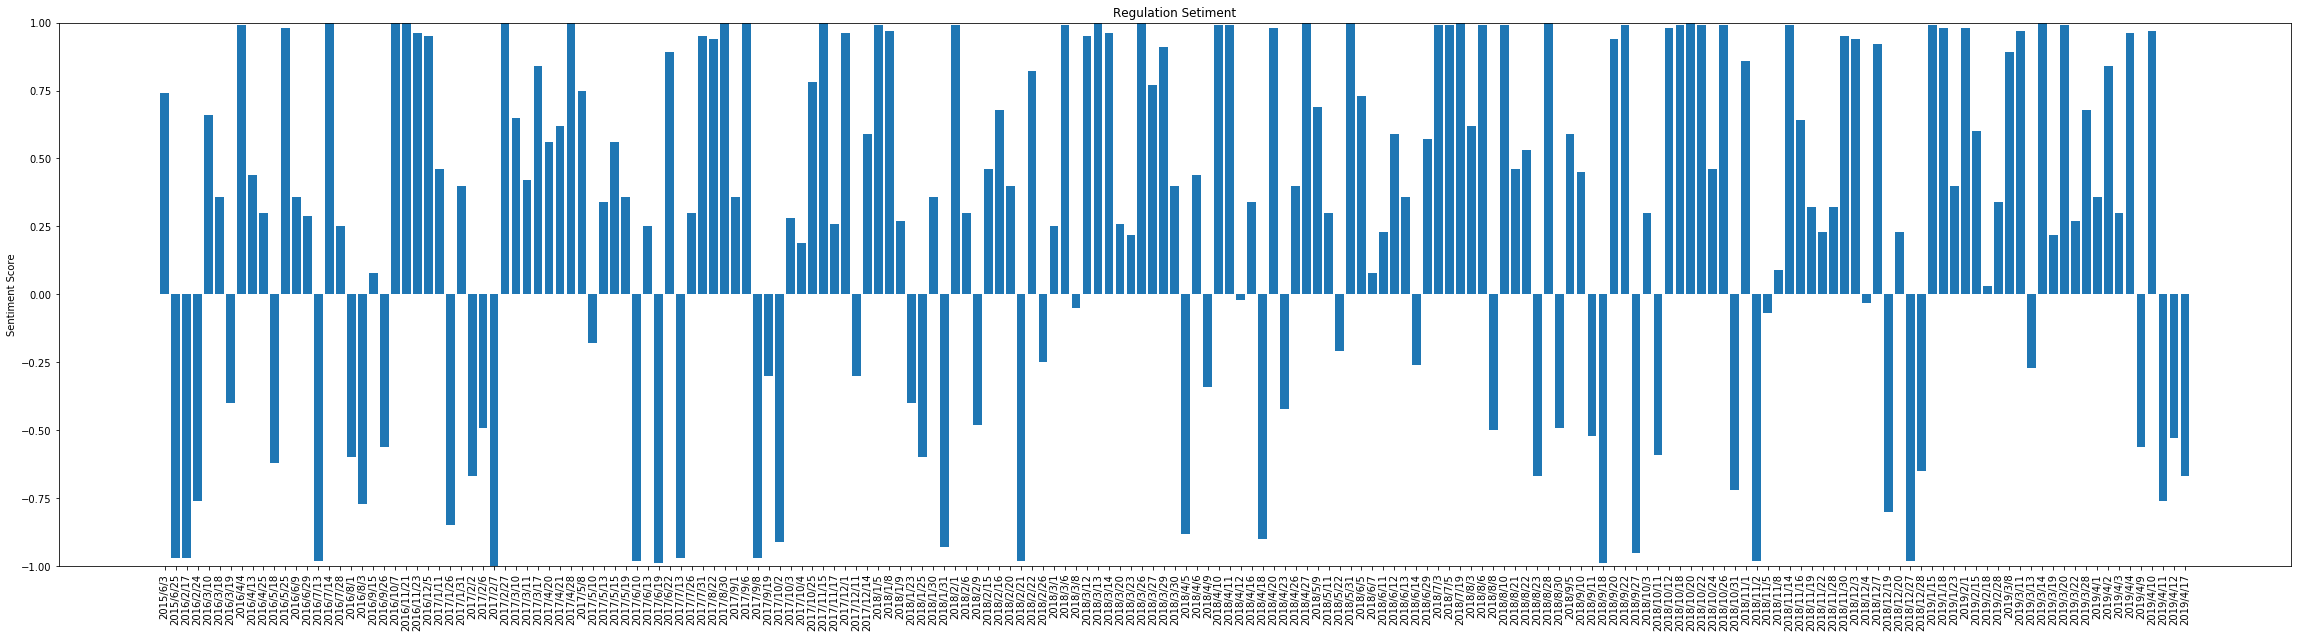

In [21]:
import matplotlib.pyplot as plt
date=[]
score=[]
pos=[]
neg=[]
for i in d:
    date.append(i)
    for k in d[i]:
        score.append(k)
        if k>0:
            a=a+1
            pos.append(a)
            a=0
            b=0
            neg.append(b)
        else:
            b=b+1
            neg.append(b)
            b=0
            a=0
            pos.append(a)

#print(date)
print(score)
plt.figure(figsize=(40,10))
plt.ylabel('Sentiment Score')
plt.title('Regulation Setiment')
plt.ylim([-1,1])
#for x,y in enumerate(score):
 #   plt.text(x,y+0.05,'%s' %round(y,1),ha='center')
plt.xticks(rotation=90)
plt.bar(date, score)
plt.show()

In [22]:
data = read_csv('Regulation.csv',header=0)
us={}
us1={}
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[0]
    y = data.iloc[i].values[2]
    z = x.split('/')[0]+'/'+x.split('/')[1]
    a = data.iloc[i].values[4]
    if'U.S.'in y or 'SEC'in y :
        if z in us:
          us[z].append(float(a))
        else:
          us[z]=[float(a)]
    #if'U.S.'in y or 'SEC'in y :
     #   print(y,a)


for key in us:
    result=round(np.mean(us[key]),2)
    #print(result)
    us1[key]=[result]
    #outcome.append(result)
#print(len(outcome))
#print(us1)    

[0.66, 0.37, 0.2, 0.25, 0.98, 0.95, 0.4, 1.0, 0.64, 0.62, 0.87, 0.05, 0.09, 1.0, 0.68, -0.15, 1.0, 0.15, 0.33, 0.43, 0.67, 0.58, 0.3, 0.09, 1.0, 0.33, 0.11, 0.56, 0.3, 0.08, 0.4, 0.66, 0.54, -0.14]


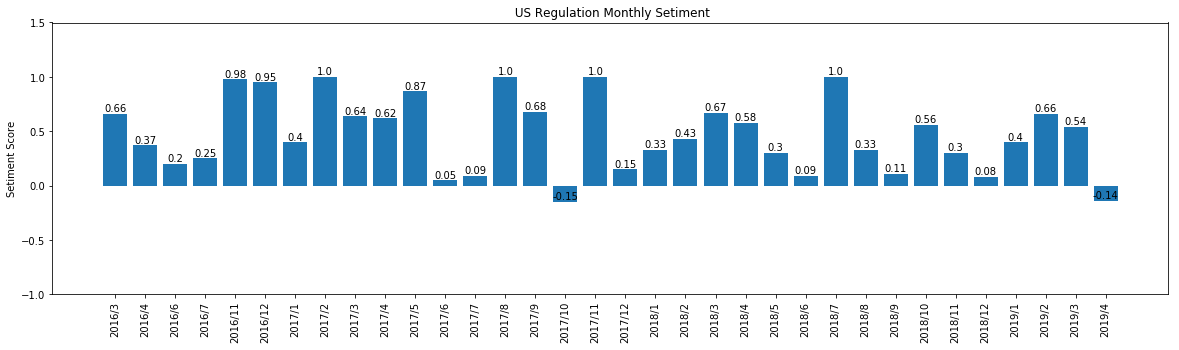

In [23]:
import matplotlib.pyplot as plt
date=[]
score=[]
for i in us1:
    date.append(i)
    for k in us1[i]:
        score.append(k)
        
print(score)
plt.figure(figsize=(20,5))
plt.ylabel('Setiment Score')
plt.title(' US Regulation Monthly Setiment')
plt.ylim([-1,1.5])
for x,y in enumerate(score):
    plt.text(x,y+0.02,'%s' %round(y,2),ha='center')
plt.xticks(rotation=90)
plt.bar(date, score)
plt.show()

In [24]:
data = read_csv('Regulation.csv',header=0)
dic={}
dic1={}
collection=[]
pos=[]
neg=[]
c=0
d=0
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[0]
    y = data.iloc[i].values[2]
    z = x.split('/')[0]+'/'+x.split('/')[1]
    a = data.iloc[i].values[4]
    if z in dic:
        dic[z].append(float(a))
    else:
        dic[z]=[float(a)]


for key in dic:
    result=round(np.mean(dic[key]),2)
    #print(result)
    dic1[key]=[result]
    a= dic[key]
    #print(a)
    for i in a:
        if i>=0:
            c=c+1
        else:
            d=d+1
    pos.append(c)
    neg.append(d)
    c=0
    d=0


print(pos)
print(neg)
#print(dic1)

[1, 0, 2, 3, 1, 3, 2, 0, 1, 1, 2, 1, 2, 1, 3, 4, 5, 2, 2, 2, 2, 3, 3, 2, 4, 9, 12, 8, 3, 8, 3, 6, 5, 8, 10, 3, 3, 5, 8, 5]
[1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 0, 0, 1, 3, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 3, 5, 2, 6, 1, 2, 0, 4, 4, 2, 4, 4, 0, 0, 2, 4]


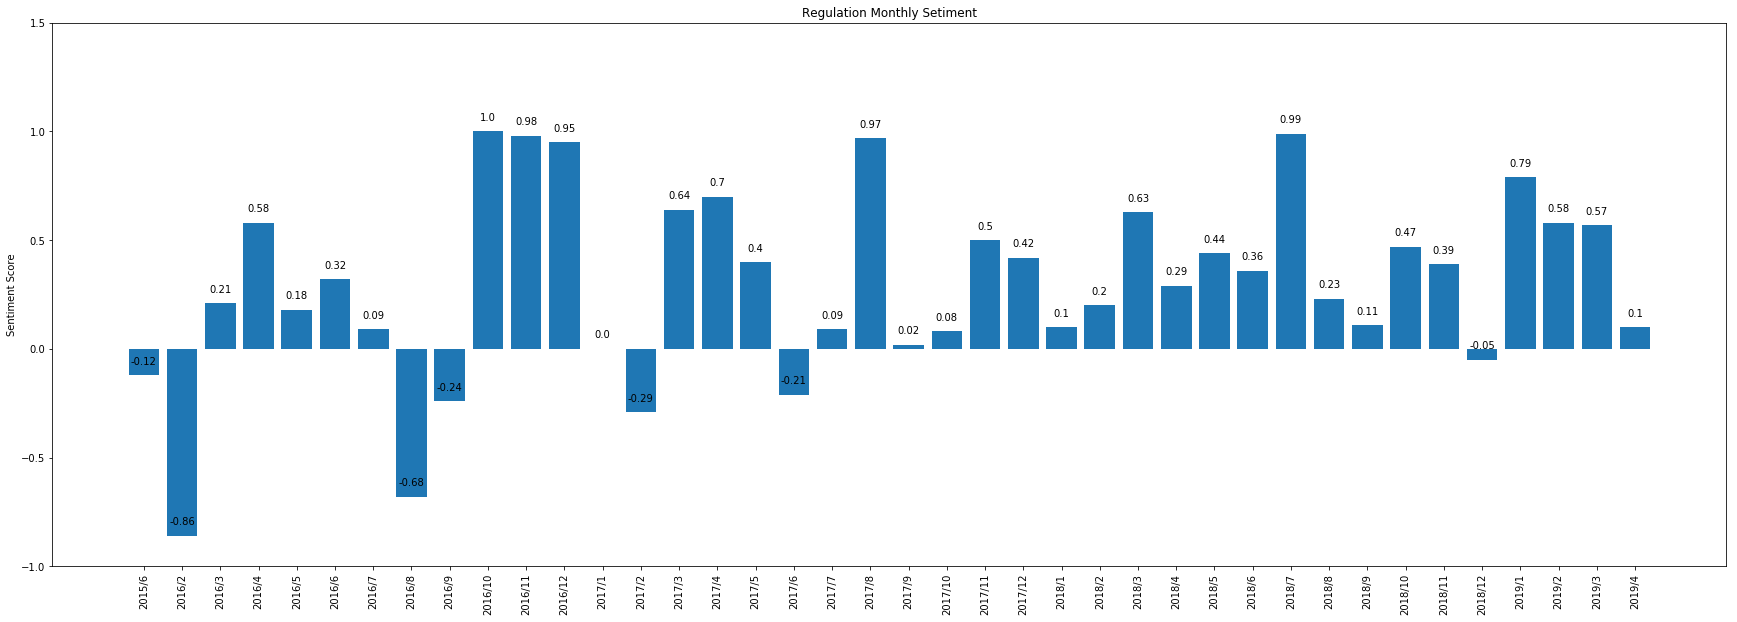

In [25]:
import matplotlib.pyplot as plt
date=[]
score=[]
a=0
b=0
for i in dic1:
    date.append(i)
    for k in dic1[i]:
        score.append(k)
#print(len(date))
#print(len(score))
plt.figure(figsize=(30,10))
plt.ylabel('Sentiment Score')
plt.title('Regulation Monthly Setiment')
plt.ylim([-1,1.5])
for x,y in enumerate(score):
    plt.text(x,y+0.05,'%s' %round(y,3),ha='center')
plt.xticks(rotation=90)
plt.bar(date, score)
plt.show()

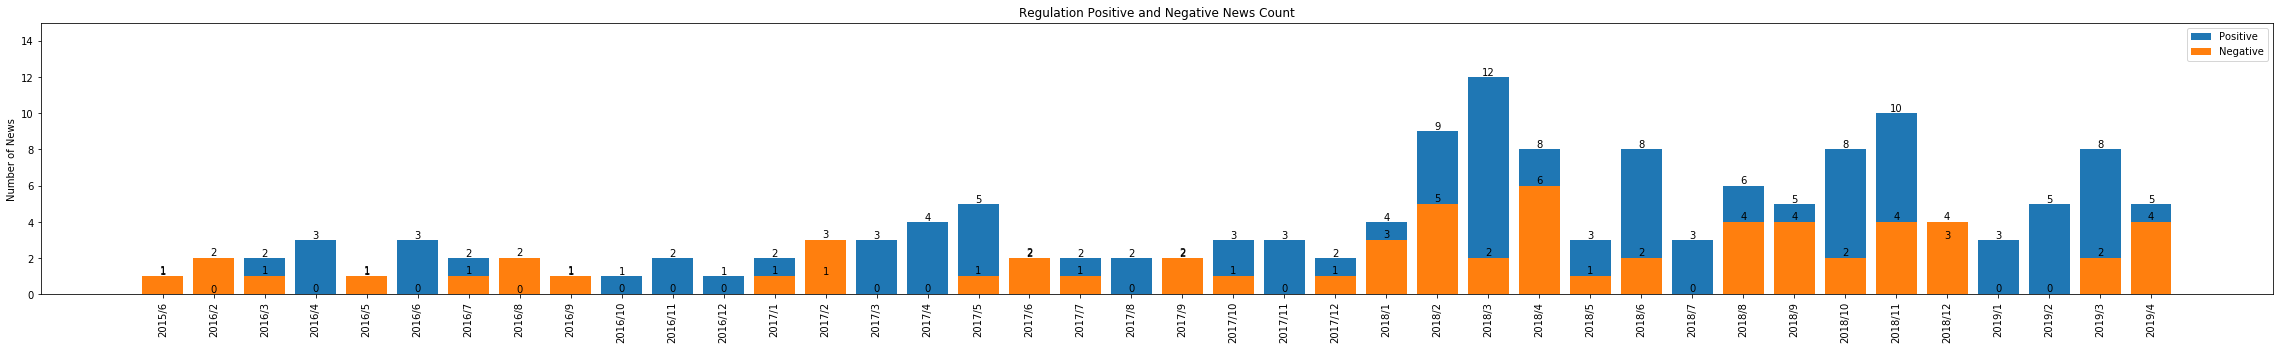

In [26]:
plt.figure(figsize=(40,5))
plt.ylabel('Number of News')
plt.title('Regulation Positive and Negative News Count')
plt.ylim([0,15])
for x,y in enumerate(pos):
    plt.text(x,y+0.1,'%s' %round(y,1),ha='center')
for x,y in enumerate(neg):
    plt.text(x,y+0.15,'%s' %round(y,1),ha='center')
plt.xticks(rotation=90)
plt.bar(date,pos,label='Positive')
plt.bar(date,neg,label='Negative')
plt.legend()
plt.show()

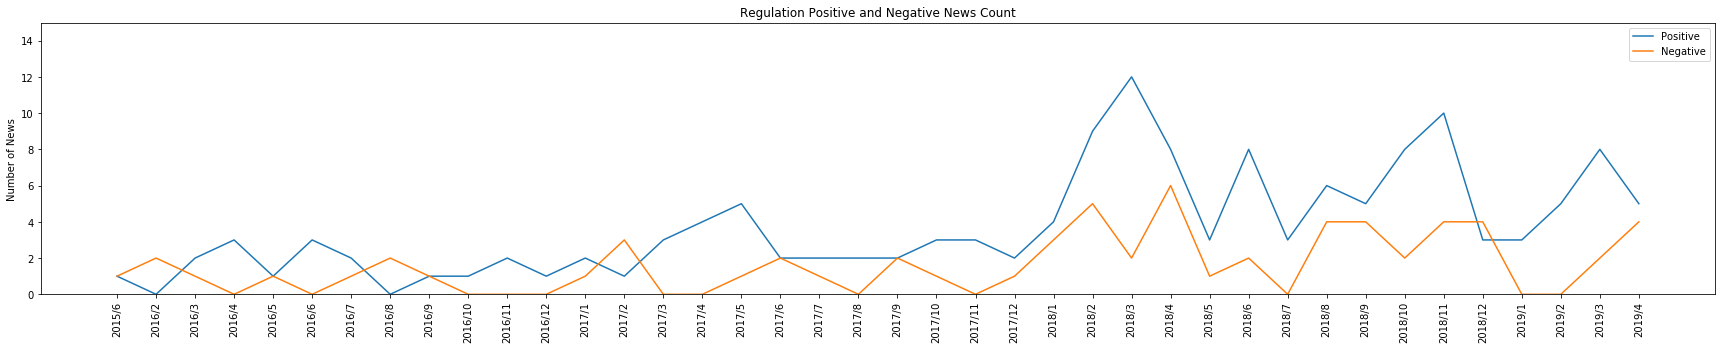

In [27]:
plt.figure(figsize=(30,5))
plt.ylabel('Number of News')
plt.title('Regulation Positive and Negative News Count')
plt.ylim([0,15])
plt.xticks(rotation=90)
plt.plot(date, pos,label='Positive')
plt.plot(date, neg,label='Negative')
#for x,y in enumerate(pos):
    #plt.text(x,y+0.1,'%s' %round(y,1),ha='center')
#for x,y in enumerate(neg):
    #plt.text(x,y+0.15,'%s' %round(y,1),ha='center')
plt.xticks(rotation=90)
plt.legend()
plt.show()

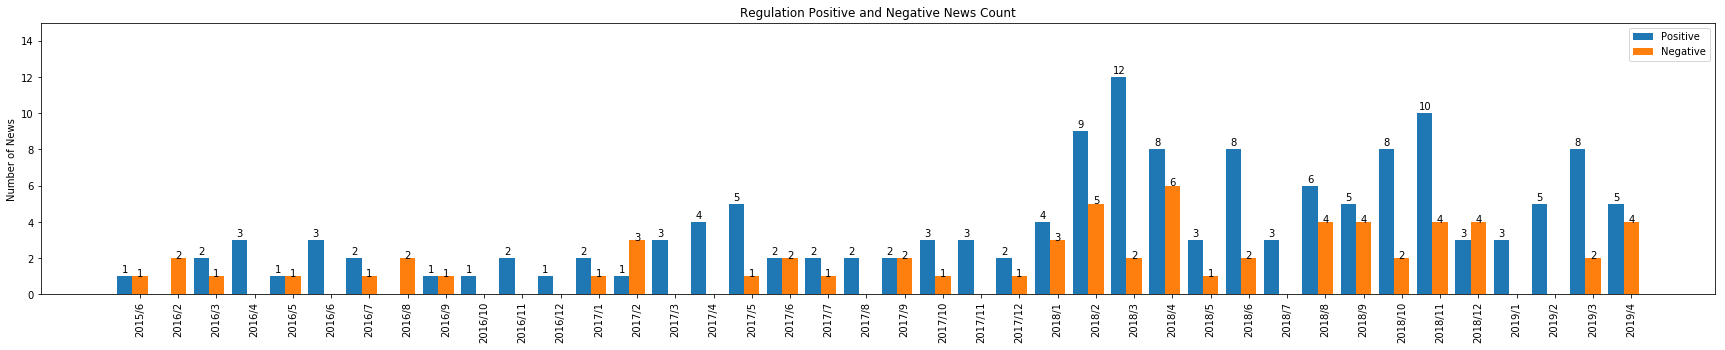

In [20]:
import numpy as np
width=0.4
z=np.linspace(1,40,40)
plt.figure(figsize=(30,5))
plt.ylabel('Number of News')
plt.title('Regulation Positive and Negative News Count')
plt.ylim([0,15])
for x,y in enumerate(pos):
    if y!=0:
        plt.text(x+1,y+0.2,'%s' %round(y,1),ha='center')
for x,y in enumerate(neg):
    if y!=0:
        plt.text(x+1.4,y+0.,'%s' %round(y,1),ha='center')
plt.xticks(rotation=90)
plt.bar(z,pos,width=width,label='Positive')
for i in range(len(z)):
    z[i]=z[i]+width
plt.bar(z, neg, width=width,tick_label=date,label='Negative')
plt.legend()
plt.show()


In [21]:
data = read_csv('Scams News.csv',header=0)
sia = SIA()
result = []
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[1]
    y = data.iloc[i].values[2]
    rs= y.replace('\n', '')
    content_score = sia.polarity_scores(rs)
    title_score = sia.polarity_scores(x)
    #result.append(score['compound'])
    if title_score['compound'] == 0:
        data['Sentiment Score'].iloc[i] = content_score['compound'] 
    #if title_score['compound'] != 0 and title_score['compound']* content_score['compound'] <0:
       # print(i,title_score['compound'],content_score['compound'])
    if title_score['compound'] != 0:
        data['Sentiment Score'].iloc[i] = min(content_score['compound'],title_score['compound']) 
        

#print(result)
print(data['Sentiment Score'])

data.to_csv('Scams News.csv',index=False, encoding='utf-8')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    -0.3612
1     0.2740
2     0.2732
3    -0.9260
4    -0.9872
5    -0.4019
6    -0.9255
7    -0.3182
8    -0.5719
9    -0.6705
10   -0.8217
11   -0.9451
12   -0.9360
13   -0.9766
14   -0.9794
15   -0.9896
Name: Sentiment Score, dtype: float64


In [27]:
data = read_csv('Law&Justice News.csv',header=0)
sia = SIA()
result = []
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[1]
    y = data.iloc[i].values[2]
    rs= y.replace('\n', '')
    content_score = sia.polarity_scores(rs)
    title_score = sia.polarity_scores(x)
    #result.append(score['compound'])
    if title_score['compound'] == 0:
        data['Sentiment Score'].iloc[i] = content_score['compound'] 
    #if title_score['compound'] != 0 and title_score['compound']* content_score['compound'] <0:
       # print(i,title_score['compound'],content_score['compound'])
    if title_score['compound'] != 0:
        data['Sentiment Score'].iloc[i] = min(content_score['compound'],title_score['compound']) 
        

#print(result)
print(data['Sentiment Score'])

data.to_csv('Law&Justice News.csv',index=False, encoding='utf-8')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0    -0.9905
1    -0.9038
2    -0.9986
3     0.8777
4     0.9977
5     0.9982
6    -0.2710
7     0.9927
8     0.2263
9    -0.1531
10    0.9949
11    0.9982
12    0.9803
13    0.9967
14   -0.9984
15    0.9971
16    0.2023
17    0.2960
18    0.6232
19    0.4939
20   -0.2732
21    0.4019
22   -0.9934
23    0.9948
24    0.9911
25    0.9974
26    0.9973
27   -0.3612
28    0.9977
29    0.9893
       ...  
70   -0.9544
71    0.9761
72   -0.5719
73    0.4588
74   -0.9001
75   -0.9732
76   -0.9671
77    0.0772
78    0.9874
79    0.0516
80   -0.9898
81    0.9842
82   -0.4818
83   -0.9679
84   -0.8519
85   -0.9829
86   -0.8807
87   -0.8807
88    0.9423
89    0.1280
90    0.6124
91    0.9713
92   -0.9996
93   -0.9383
94   -0.9911
95    0.9842
96   -0.9691
97   -0.3400
98    0.0258
99    0.9313
Name: Sentiment Score, Length: 100, dtype: float64


In [24]:
data = read_csv('technical news.csv',header=0)
sia = SIA()
result = []
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[1]
    y = data.iloc[i].values[2]
    rs= y.replace('\n', '')
    content_score = sia.polarity_scores(rs)
    title_score = sia.polarity_scores(x)
    #result.append(score['compound'])
    if title_score['compound'] == 0:
        data['Sentiment Score'].iloc[i] = content_score['compound'] 
    #if title_score['compound'] != 0 and title_score['compound']* content_score['compound'] <0:
       # print(i,title_score['compound'],content_score['compound'])
    if title_score['compound'] != 0:
        data['Sentiment Score'].iloc[i] = min(content_score['compound'],title_score['compound']) 
        

#print(result)
print(data['Sentiment Score'])

data.to_csv('technical news.csv',index=False, encoding='utf-8')

0     -0.4576
1      0.9919
2      0.6891
3     -0.1027
4      0.3182
5     -0.1027
6     -0.2604
7      0.9977
8      0.9888
9     -0.9162
10     0.9974
11     0.3182
12     0.4215
13    -0.4215
14    -0.9778
15    -0.5629
16     0.4588
17     0.4019
18     0.4019
19     0.9961
20     0.3612
21     0.1793
22     0.3400
23    -0.9388
24     0.9941
25     0.9028
26     0.3818
27    -0.1531
28     0.4404
29     0.9929
        ...  
151    0.3400
152   -0.1027
153   -0.4404
154    0.4404
155    0.9993
156    0.9978
157    0.9698
158    0.9744
159    0.9843
160   -0.1027
161    0.9989
162   -0.9959
163    0.9964
164    0.9958
165    0.8382
166    0.9914
167   -0.1779
168   -0.9952
169    0.9980
170    0.9436
171    0.9910
172    0.9970
173    0.4215
174    0.9996
175   -0.9905
176    0.4588
177    0.9984
178    0.3400
179   -0.8107
180    0.2500
Name: Sentiment Score, Length: 181, dtype: float64


In [28]:
import pandas as pd
combiner=[]
combiner.append(pd.read_csv('Privacy & Security .csv',delimiter=',',names=['Date','Title','Cotnent','Category','Sentiment Score']))
combiner.append(pd.read_csv('Law&Justice News.csv',delimiter=',',names=['Date','Title','Cotnent','Category','Sentiment Score'],skiprows=1))
combiner.append(pd.read_csv('Regulation.csv',delimiter=',',names=['Date','Title','Cotnent','Category','Sentiment Score'],skiprows=1))
combiner.append(pd.read_csv('Scams News.csv',delimiter=',',names=['Date','Title','Cotnent','Category','Sentiment Score'],skiprows=1))
combiner.append(pd.read_csv('technical news.csv',delimiter=',',names=['Date','Title','Cotnent','Category','Sentiment Score'],skiprows=1))
out=pd.concat(combiner,)

out.to_csv('News_result.csv',header=None,index=False)


In [29]:
import numpy as np 
import csv
data = read_csv('News_result.csv',header=0)
outcome=[]
dic={}
d={}
list1=[]
list2=[]
list3=[]
for i in range(0,data.shape[0]):
    x = str(data.iloc[i].values[0])
    y = data.iloc[i].values[4]
    if x in dic:
        dic[x].append(float(y))
    else:
        dic[x]=[float(y)]

for key in dic:
    result=round(np.mean(dic[key]),2)
    d[key]=[result]
    outcome.append(result)
#print(d)

for key in d.keys():
    list1.append(key)
for value in d.values():
    list2.append(value)
for i in range(0,len(list2)):
    x1=str(list2[i]).replace('[','')
    x2=x1.replace(']','')
    list3.append(x2)

dataframe = pd.DataFrame({'Date':list1,'Average Sentiment':list3 })
dataframe.sort_values("Date",inplace=True)
dataframe.to_csv('daily news sentiment.csv')

[-0.8, -0.97, -0.8, 0.23, -0.94, 0.01, 0.34, 0.15, -0.27, 0.32, -0.23, -0.89, -0.3, 1.0, 0.83, 0.38, 0.98, -0.49, -0.0, 0.51, -0.6, -0.23, 0.99, 0.67, 0.53, 0.2, 0.99, 0.64, -0.4, 0.62, 0.81, -1.0, 0.3, 0.34, 0.38, 0.54, 0.08, 1.0, 0.15, -0.99, 0.96, 0.01, 0.3, -0.98, -0.97, -0.05, 0.03, -1.0, 1.0, 0.98, -0.06, -0.89, 0.79, 0.98, -1.0, 0.76, 0.85, 0.76, 0.13, 0.78, -0.38, -0.36, 0.04, 0.53, 0.13, 0.53, -0.0, -0.97, 0.41, -0.24, 0.99, 0.99, 0.08, -0.48, -0.32, -0.31, -0.0, -0.95, -0.4, -0.97, 0.98, 0.72, -0.54, -0.36, -0.28, -0.63, 0.96, 0.95, 0.36, -0.31, 0.32, -0.95, -0.99, -0.9, -0.75, 0.6, 0.37, 1.0, -0.27, 0.99, -0.36, -0.15, 0.99, 0.68, 0.99, -0.0, 0.26, -0.07, 0.62, 0.49, -0.27, 0.42, 0.12, 0.99, 1.0, -0.36, 1.0, 0.99, 1.0, 0.05, -0.51, 0.8, 0.98, -0.91, -0.88, -0.14, -1.0, -1.0, -0.35, -0.08, 0.25, 0.35, -0.83, -0.15, 0.3, 0.07, 0.21, 0.73, -0.36, -0.97, 0.0, 0.89, 0.01, -0.99, -0.97, -0.97, -0.5, 0.3, 0.25, 0.02, -0.54, -0.95, 0.98, -0.78, -0.44, 0.18, -0.0, 0.23, -0.97, -0.92,

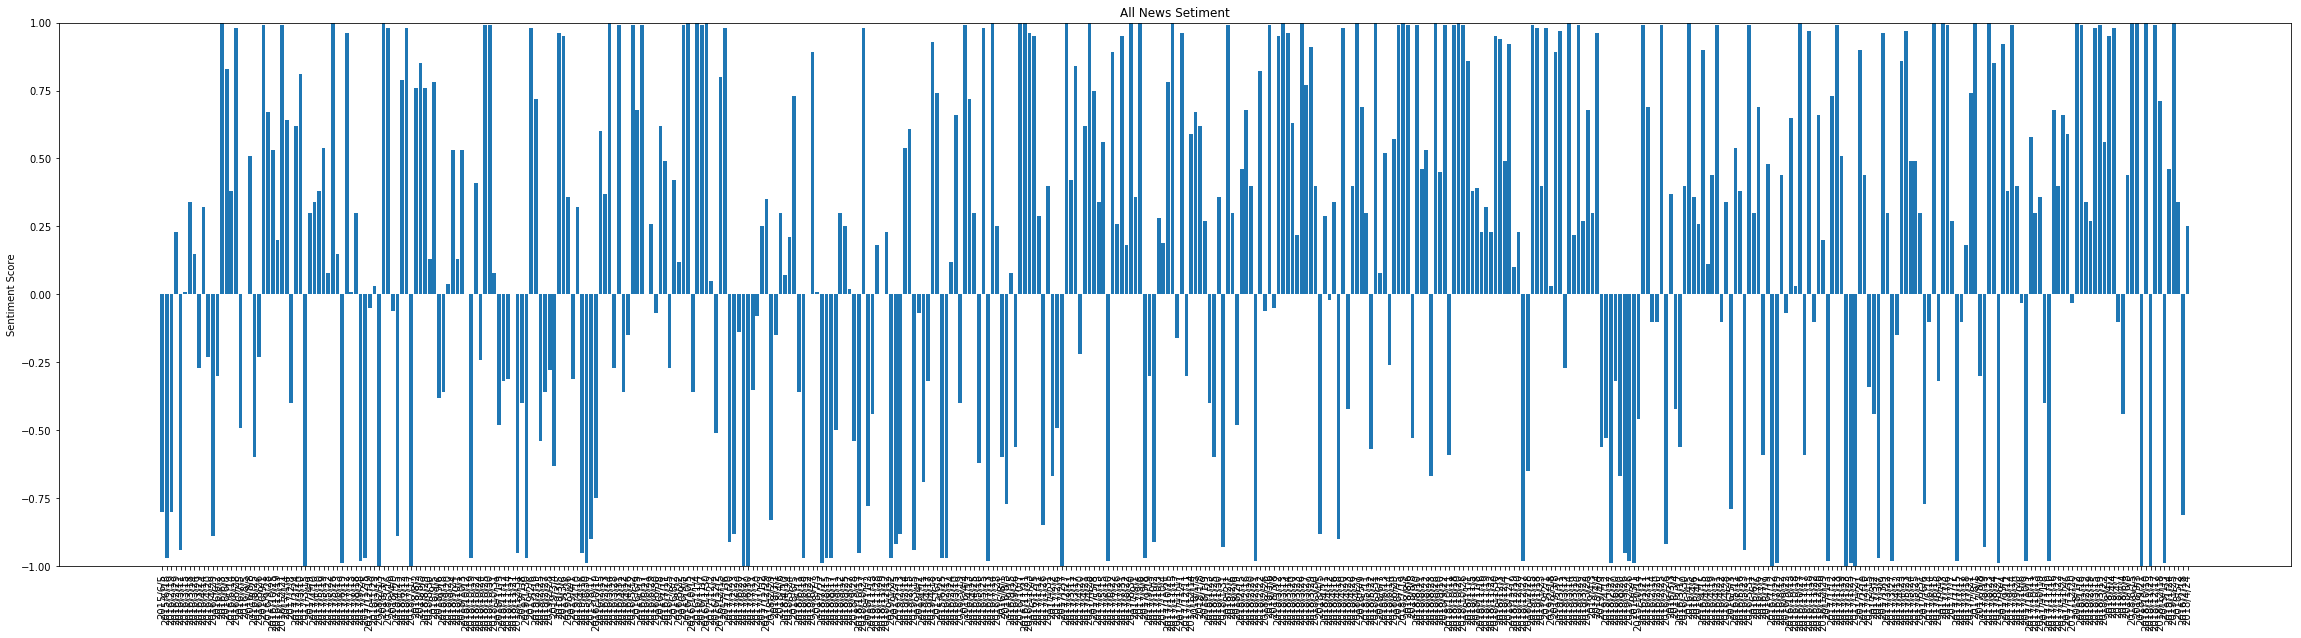

In [30]:
import matplotlib.pyplot as plt
date=[]
score=[]
pos=[]
neg=[]
for i in d:
    date.append(i)
    for k in d[i]:
        score.append(k)
        if k>0:
            a=a+1
            pos.append(a)
            a=0
            b=0
            neg.append(b)
        else:
            b=b+1
            neg.append(b)
            b=0
            a=0
            pos.append(a)

#print(date)
print(score)
plt.figure(figsize=(40,10))
plt.ylabel('Sentiment Score')
plt.title('All News Setiment')
plt.ylim([-1,1])
#for x,y in enumerate(score):
 #   plt.text(x,y+0.05,'%s' %round(y,1),ha='center')
plt.xticks(rotation=90)
plt.bar(date, score)
plt.show()

In [32]:
data = read_csv('daily-news-sentiment.csv',header=0)
dic={}
dic1={}
collection=[]
pos=[]
neg=[]
neu=[]
c=0
d=0
e=0
for i in range(0,data.shape[0]):
    x = data.iloc[i].values[0]
    z = x.split('/')[0]+'/'+x.split('/')[1]
    a = data.iloc[i].values[1]
    if z in dic:
        dic[z].append(float(a))
    else:
        dic[z]=[float(a)]


for key in dic:
    result=round(np.mean(dic[key]),2)
    #print(result)
    dic1[key]=[result]
    a= dic[key]
    #print(a)
    for i in a:
        if i>0:
            c=c+1
        elif i<0:
            d=d+1
        else:
            e=e+1
    pos.append(c)
    neg.append(d)
    neu.append(e)
    c=0
    d=0
    e=0

print(pos)
print(neg)
print(neu)

[1, 0, 0, 1, 6, 8, 12, 5, 8, 6, 4, 4, 6, 6, 6, 7, 4, 5, 5, 11, 3, 9, 6, 6, 6, 5, 5, 7, 8, 15, 10, 5, 8, 4, 9, 9, 11, 8, 8, 5, 6, 10, 4]
[4, 1, 1, 0, 6, 6, 5, 3, 2, 6, 4, 2, 2, 2, 1, 6, 6, 4, 2, 0, 8, 4, 3, 3, 3, 3, 4, 3, 6, 2, 7, 1, 5, 2, 5, 6, 4, 6, 3, 4, 6, 4, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0]


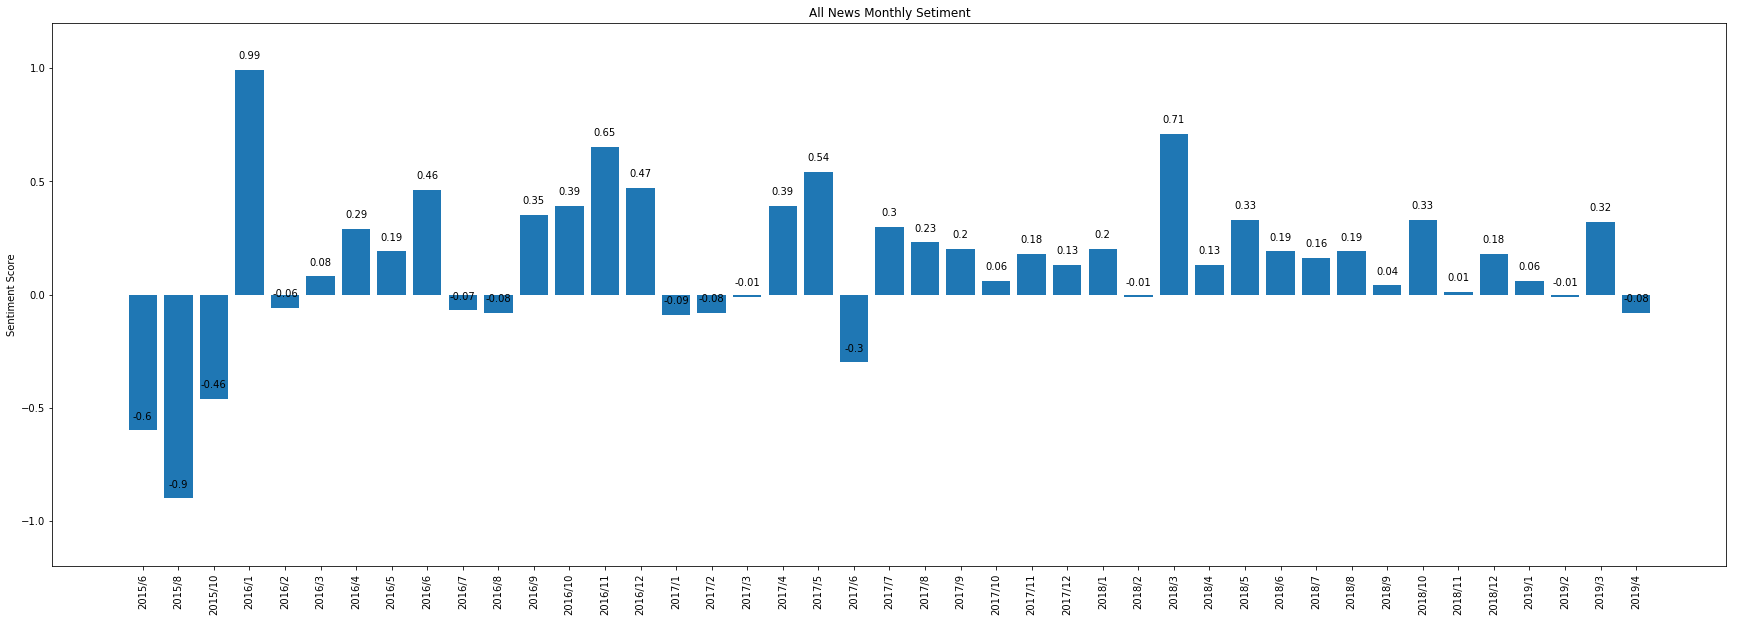

In [33]:
import matplotlib.pyplot as plt
date=[]
score=[]
a=0
b=0
for i in dic1:
    date.append(i)
    for k in dic1[i]:
        score.append(k)
#print(len(date))
#print(len(score))
plt.figure(figsize=(30,10))
plt.ylabel('Sentiment Score')
plt.title('All News Monthly Setiment')
plt.ylim([-1.2,1.2])
for x,y in enumerate(score):
    plt.text(x,y+0.05,'%s' %round(y,3),ha='center')
plt.xticks(rotation=90)
plt.bar(date, score)
plt.show()

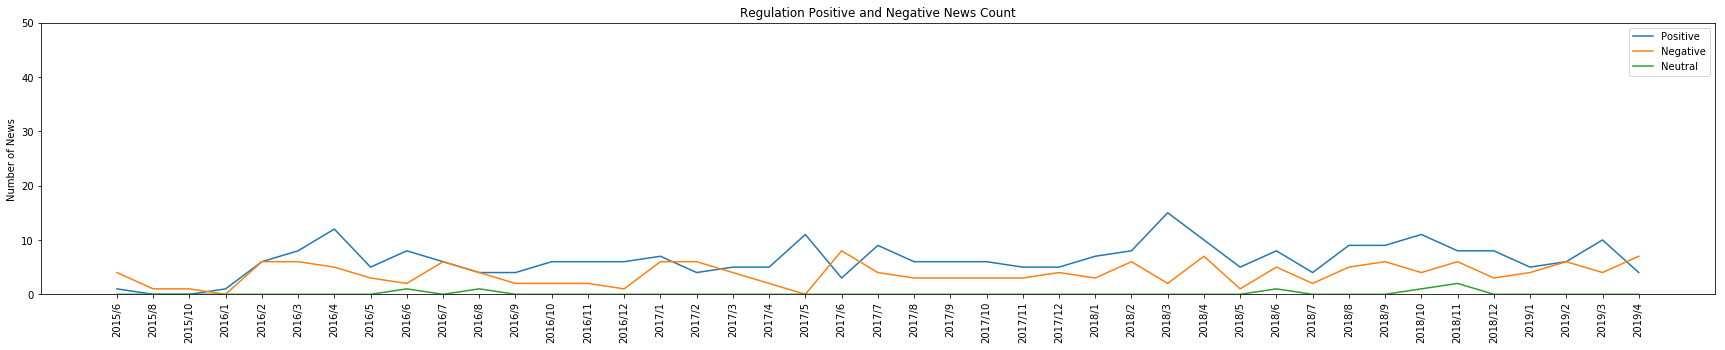

In [34]:
plt.figure(figsize=(30,5))
plt.ylabel('Number of News')
plt.title('All News Positive and Negative News Count')
plt.ylim([0,50])
plt.xticks(rotation=90)
plt.plot(date, pos,label='Positive')
plt.plot(date, neg,label='Negative')
plt.plot(date, neu,label='Neutral')
#for x,y in enumerate(pos):
    #plt.text(x,y+0.1,'%s' %round(y,1),ha='center')
#for x,y in enumerate(neg):
    #plt.text(x,y+0.15,'%s' %round(y,1),ha='center')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt
width=0.4
z=np.linspace(1,43,43)
plt.figure(figsize=(30,5))
plt.ylabel('Number of News')
plt.title('All News Positive and Negative News Count')
plt.ylim([0,20])
for x,y in enumerate(pos):
    if y!=0:
        plt.text(x+1,y+0.2,'%s' %round(y,1),ha='center')
for x,y in enumerate(neg):
    if y!=0:
        plt.text(x+1.4,y+0.5,'%s' %round(y,1),ha='center')
#for x,y in enumerate(neu):
 #   if y!=0:
  #      plt.text(x+1.8,y+0.8,'%s' %round(y,1),ha='center')
plt.xticks(rotation=90)
plt.bar(z,pos,width=width,label='Positive')
for i in range(len(z)):
    z[i]=z[i]+width
plt.bar(z, neg, width=width,tick_label=date,label='Negative')
#for i in range(len(z)):
 #   z[i]=z[i]+width
#plt.bar(z, neu, width=width,tick_label=date,label='Neutral')
plt.legend()
plt.show()

NameError: name 'pos' is not defined